<a href="https://colab.research.google.com/github/MuneneMutuma/Stock-Classification-Buy-Sell/blob/main/Classification_Buy_Sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

### Import Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve,roc_auc_score
from sklearn import metrics


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Download and Load Data

In [ ]:
!wget https://raw.githubusercontent.com/MuneneMutuma/stock-prediction/main/NSE_data_all_stocks_2022_jan_to_may.csv

--2023-12-22 10:44:24--  https://raw.githubusercontent.com/MuneneMutuma/stock-prediction/main/NSE_data_all_stocks_2022_jan_to_may.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 552108 (539K) [text/plain]
Saving to: ‘NSE_data_all_stocks_2022_jan_to_may.csv’

NSE_data_all_stocks 100%[===================>] 539.17K  --.-KB/s    in 0.04s   

2023-12-22 10:44:25 (12.3 MB/s) - ‘NSE_data_all_stocks_2022_jan_to_may.csv’ saved [552108/552108]



In [ ]:
dataset_df = pd.read_csv('./NSE_data_all_stocks_2022_jan_to_may.csv')

In [ ]:
dataset_df.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,EGAD,Eaagads Ltd,10,15,13.5,13.8,13.5,13.5,-,-,"4,000",-
1,3-Jan-22,KUKZ,Kakuzi Plc,355,427,385,385,385,385,-,-,-,-
2,3-Jan-22,KAPC,Kapchorua Tea Kenya Plc,80,101,99.5,99.5,99.5,95.5,4,4.19%,100,-
3,3-Jan-22,LIMT,Limuru Tea Plc,260,360,320,320,320,320,-,-,-,-
4,3-Jan-22,SASN,Sasini Plc,16.75,22.6,18.7,18.7,18.7,18.7,-,-,-,-


## EDA

In [ ]:
dataset_df.Change.unique()

array(['-', '4', '2', '-0.1', '0.05', '0.3', '0.1', '0.25', '-0.25',
       '1.75', '0.07', '-0.03', '-0.38', '1.3', '-0.01', '-0.04', '0.2',
       '0.03', '-0.16', '-0.5', '0.06', '0.55', '-1.5', '0.5', '0.16',
       '-0.65', '-9.5', '-2', '-0.05', '0.02', '-0.54', '-0.45', '0.01',
       '0.15', '0.12', '0.9', '35', '1.25', '-1.25', '-3.35', '2.5',
       '-0.09', '0.45', '-0.08', '-0.6', '0.4', '-0.07', '-0.02', '-0.2',
       '-0.3', '0.95', '3.1', '0.08', '0.35', '0.75', '-0.17', '1.35',
       '-0.15', '-6.25', '-3', '0.38', '1', '3.35', '-0.06', '0.04',
       '-0.7', '3.65', '-0.35', '-0.14', '-1.05', '-1.4', '0.34', '-35',
       '5.25', '2.75', '4.05', '-0.75', '-0.55', '0.26', '0.14', '0.6',
       '-0.36', '3', '-2.25', '-0.9', '1.65', '-4.5', '4.45', '-1.75',
       '-0.4', '-0.22', '-0.18', '-1', '4.8', '-0.13', '-8.5', '-1.15',
       '0.23', '-0.47', '0.7', '1.4', '1.7', '6.75', '0.8', '-1.55',
       '-0.34', '-1.3', '6.25', '0.65', '-0.42', '-0.24', '3.25', '0.17',


## Preprocessing

In [ ]:
dataset_df['Change'].replace('-', 0, inplace=True)
dataset_df['Change'] = dataset_df['Change'].astype(float)

In [ ]:
dataset_df['Direction'] = dataset_df['Change'].apply(lambda x: 1 if x > 0 else 0)

## Feature Selection

In [ ]:
features = ['12m High', '12m Low', 'Day Low', 'Day High', 'Change']
target_variable = 'Direction'

In [ ]:
dataset_df[features] = dataset_df[features].replace({',': ''}, regex=True)
dataset_df[features] = dataset_df[features].astype(float)

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_df[features], dataset_df[target_variable], test_size=0.2, random_state=42, shuffle=False)

## Model Training

In [ ]:
logclass = LogisticRegression()
log_pred = logclass.fit(X_train, y_train)

In [ ]:
probability = log_pred.predict_proba(X_test)
predicted = log_pred.predict(X_test)

In [ ]:
log_pred.classes_

array([0, 1])

## Performance Analysis

In [ ]:
cf_matrix = confusion_matrix(y_test, predicted)

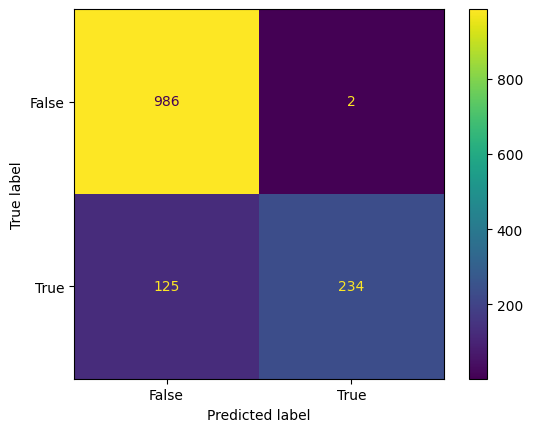

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
accuracy = metrics.accuracy_score(y_test, predicted)
accuracy

0.9057164068299925

In [ ]:
def plot_roc_curve(y_test, y_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
    area = roc_auc_score(y_test, probability[:, 1])
    plt.plot([0, 1], [0, 1], color='red', label='baseline', linestyle='--')
    plt.plot(fpr, tpr, color='blue', label=f"ROC curve (area = {area:.3f})")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

AUC Score: 0.9949026197376878


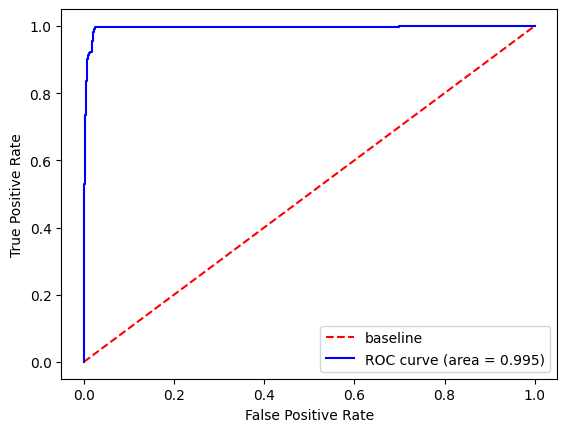

In [ ]:
plot_roc_curve(y_test, probability)
print(f'AUC Score: {roc_auc_score(y_test, probability[:, 1])}')